## 批标准化

In [1]:
from mxnet.gluon import nn
import Xinet as T
from mxnet import autograd 
from mxnet import gluon
from mxnet import nd
from time import time

net = nn.Sequential()
with net.name_scope():
    # 第一层卷积
    net.add(nn.Conv2D(channels=20, kernel_size=5))
    ### 添加了批量归一化层 
    net.add(nn.BatchNorm(axis=1))
    net.add(nn.Activation(activation='relu'))
    net.add(nn.MaxPool2D(pool_size=2, strides=2))
    # 第二层卷积
    net.add(nn.Conv2D(channels=50, kernel_size=3))
    ### 添加了批量归一化层 
    net.add(nn.BatchNorm(axis=1))
    net.add(nn.Activation(activation='relu'))
    net.add(nn.MaxPool2D(pool_size=2, strides=2))
    net.add(nn.Flatten())
    # 第一层全连接
    net.add(nn.Dense(128, activation="relu"))
    # 第二层全连接
    net.add(nn.Dense(10))
    
ctx = T.try_gpu()
net.initialize(ctx=ctx)

c:\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
c:\anaconda3\lib\site-packages\urllib3\contrib\pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


In [2]:
batch_size = 32
num_epochs = 10
root = 'E:/Data/MXNet/fashion-mnist'
_train = gluon.data.vision.FashionMNIST(root= root, train= True, transform= T.transform2D)
_test = gluon.data.vision.FashionMNIST(root= root, train= False, transform= T.transform2D)

train_data = gluon.data.DataLoader(_train, batch_size, shuffle= True)
test_data = gluon.data.DataLoader(_test, batch_size, shuffle= False)

softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})
T.train(train_data, test_data, net, softmax_cross_entropy, trainer, ctx, num_epochs, batch_size)

c:\anaconda3\lib\site-packages\mxnet\gluon\data\vision\datasets.py:82: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  label = np.fromstring(fin.read(), dtype=np.uint8).astype(np.int32)
c:\anaconda3\lib\site-packages\mxnet\gluon\data\vision\datasets.py:86: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(fin.read(), dtype=np.uint8)


('Start training on ', gpu(0))
Epoch 0. Loss: 0.444318, Train acc 0.835533, Test acc 0.8742, Time 25.0616 sec
Epoch 1. Loss: 0.298982, Train acc 0.890017, Test acc 0.894, Time 24.3568 sec
Epoch 2. Loss: 0.256268, Train acc 0.904667, Test acc 0.8943, Time 24.3628 sec
Epoch 3. Loss: 0.227839, Train acc 0.916433, Test acc 0.9099, Time 24.3768 sec
Epoch 4. Loss: 0.206323, Train acc 0.923167, Test acc 0.9121, Time 24.2976 sec
Epoch 5. Loss: 0.187316, Train acc 0.929933, Test acc 0.9133, Time 24.3838 sec
Epoch 6. Loss: 0.173157, Train acc 0.93385, Test acc 0.9138, Time 24.2836 sec
Epoch 7. Loss: 0.157567, Train acc 0.941567, Test acc 0.9137, Time 24.3307 sec
Epoch 8. Loss: 0.145869, Train acc 0.944917, Test acc 0.9177, Time 24.5252 sec
Epoch 9. Loss: 0.133532, Train acc 0.95125, Test acc 0.9057, Time 24.4249 sec


In [3]:
print(len(_train))
print(len(train_data))
for x, y in test_data:
    print(x.shape, y.shape)
    break

60000
1875
(32, 1, 28, 28) (32,)


In [4]:
batch_size = 32
num_epochs = 10
root = 'E:/Data/MXNet/fashion-mnist'
_train = gluon.data.vision.FashionMNIST(root= root, train= True, transform= T.transform3D)
_test = gluon.data.vision.FashionMNIST(root= root, train= False, transform= T.transform3D)
train_data = T.DataLoader(_train, batch_size, shuffle= True)
test_data = T.DataLoader(_test, batch_size, shuffle= False)

softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})
T.train(train_data, test_data, net, softmax_cross_entropy, trainer, ctx, num_epochs, batch_size)

c:\anaconda3\lib\site-packages\mxnet\gluon\data\vision\datasets.py:82: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  label = np.fromstring(fin.read(), dtype=np.uint8).astype(np.int32)
c:\anaconda3\lib\site-packages\mxnet\gluon\data\vision\datasets.py:86: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(fin.read(), dtype=np.uint8)


('Start training on ', gpu(0))
Epoch 0. Loss: 0.121397, Train acc 0.955317, Test acc 0.9207, Time 15.1641 sec
Epoch 1. Loss: 0.113335, Train acc 0.9581, Test acc 0.9204, Time 15.4631 sec
Epoch 2. Loss: 0.102393, Train acc 0.962, Test acc 0.9136, Time 14.9447 sec
Epoch 3. Loss: 0.0950823, Train acc 0.964933, Test acc 0.9083, Time 15.2781 sec
Epoch 4. Loss: 0.0872219, Train acc 0.967867, Test acc 0.9155, Time 15.1723 sec
Epoch 5. Loss: 0.0787538, Train acc 0.971333, Test acc 0.916, Time 16.2569 sec
Epoch 6. Loss: 0.0732867, Train acc 0.97275, Test acc 0.9198, Time 16.501 sec
Epoch 7. Loss: 0.0655968, Train acc 0.9757, Test acc 0.9144, Time 15.0163 sec
Epoch 8. Loss: 0.0615543, Train acc 0.9771, Test acc 0.9167, Time 14.8645 sec
Epoch 9. Loss: 0.0557195, Train acc 0.9798, Test acc 0.915, Time 14.9006 sec


In [5]:
print(len(_train))
print(len(train_data))

60000
1875


In [6]:
data = _train[:]
X = nd.array(data[0])
y = nd.array(data[1])

In [7]:
for x, y in test_data:
    print(x.shape, y.shape)
    break

(32, 1, 28, 28) (32,)


In [8]:
trainer = gluon.Trainer??

In [ ]:
def step(self, batch_size, ignore_stale_grad=False):
        """Makes one step of parameter update. Should be called after
        `autograd.compute_gradient` and outside of `record()` scope.

        Parameters
        ----------
        batch_size : int
            Batch size of data processed. Gradient will be normalized by `1/batch_size`.
            Set this to 1 if you normalized loss manually with `loss = mean(loss)`.
        ignore_stale_grad : bool, optional, default=False
            If true, ignores Parameters with stale gradient (gradient that has not
            been updated by `backward` after last step) and skip update.
        """
        if not self._kv_initialized:
            self._init_kvstore()

        self._optimizer.rescale_grad = self._scale / batch_size

        for i, param in enumerate(self._params):
            if param.grad_req == 'null':
                continue
            if not ignore_stale_grad:
                for data in param.list_data():
                    if not data._fresh_grad:
                        raise UserWarning(
                            "Gradient of Parameter `%s` on context %s has not been updated "
                            "by backward since last `step`. This could mean a bug in your "
                            "model that maked it only use a subset of the Parameters (Blocks) "
                            "for this iteration. If you are intentionally only using a subset, "
                            "call step with ignore_stale_grad=True to suppress this "
                            "warning and skip updating of Parameters with stale gradient" \
                            %(param.name, str(data.context)))

            if self._kvstore:
                self._kvstore.push(i, param.list_grad(), priority=-i)
                if self._update_on_kvstore:
                    self._kvstore.pull(i, param.list_data(), priority=-i)
                    continue
                else:
                    self._kvstore.pull(i, param.list_grad(), priority=-i)

            for upd, arr, grad in zip(self._updaters, param.list_data(), param.list_grad()):
                if not ignore_stale_grad or arr._fresh_grad:
                    upd(i, grad, arr)
                    arr._fresh_grad = False


# 优化算法

## [优化算法概述](http://zh.gluon.ai/chapter_optimization/optimization-intro.html)

### 局部最小值


In [1]:
from mxnet.gluon import nn
import Xinet as T
from mxnet import autograd 
from mxnet import gluon
from mxnet import nd
from time import time

c:\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
c:\anaconda3\lib\site-packages\urllib3\contrib\pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


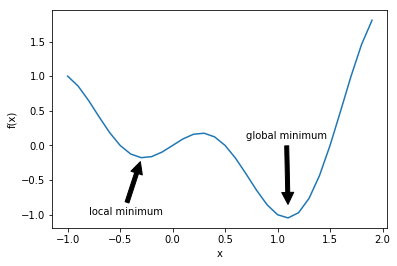

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * np.cos(np.pi * x)

x = np.arange(-1.0, 2.0, 0.1)
fig = plt.figure()
subplt = fig.add_subplot(111)
subplt.annotate('local minimum', xy=(-0.3, -0.2), xytext=(-0.8, -1.0),
            arrowprops=dict(facecolor='black', shrink=0.05))
subplt.annotate('global minimum', xy=(1.1, -0.9), xytext=(0.7, 0.1),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### 鞍点

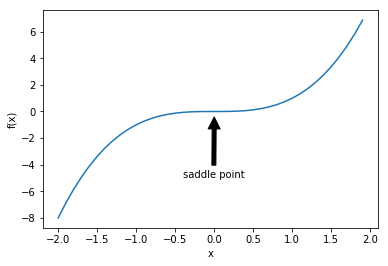

In [3]:
x = np.arange(-2.0, 2.0, 0.1)
fig = plt.figure()
subplt = fig.add_subplot(111)
subplt.annotate('saddle point', xy=(0, -0.2), xytext=(-0.4, -5.0),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(x, x**3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

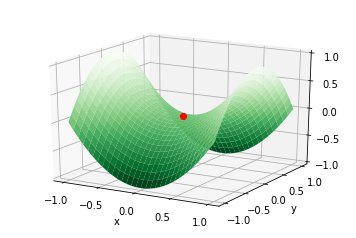

In [4]:

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.mgrid[-1:1:31j, -1:1:31j]
z = x**2 - y**2
ax.plot_surface(x, y, z, **{'rstride': 1, 'cstride': 1, 'cmap': "Greens_r"})
ax.plot([0], [0], [0], 'ro')
ax.view_init(azim=-60, elev=20)
plt.xticks([-1, -0.5, 0, 0.5, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 小批量随机梯度下降

In [5]:
def sgd(params, lr, batch_size):
    for param in params:
        param = param - lr * param.grad / batch_size

我们以线性回归为例。其中真实参数 `w` 为 `[2, -3.4]`，`b` 为 `4.2`。

In [60]:
import mxnet as mx
from mxnet import autograd
from mxnet import ndarray as nd
from mxnet import gluon
import random

mx.random.seed(1)
random.seed(1)

# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = nd.array([2, -3.4])
true_b = 4.2
X = nd.random_normal(scale=1, shape=(num_examples, num_inputs))
y = nd.dot(X, true_w,) + true_b
y += .01 * nd.random_normal(scale=1, shape=y.shape)
dataset = gluon.data.ArrayDataset(X, y)

In [67]:
# 构造迭代器。
def data_iter(batch_size):
    idx = np.arange(num_examples)
    np.random.shuffle(idx)
    for batch_i, i in enumerate(range(0, num_examples, batch_size)):
        j = nd.array(idx[i: min(i + batch_size, num_examples)])
        yield batch_i, X.take(j), y.take(j)

# 初始化模型参数。
def init_params():
    w = nd.random_normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    params = [w, b]
    for param in params:
        param.attach_grad()
    return params

# 线性回归模型。
def net(X, w, b):
    return nd.dot(X, w) + b

# 损失函数。
def square_loss(yhat, y):
    return (yhat - y.reshape(yhat.shape)) ** 2 / 2

接下来定义训练函数。当 `epoch` 大于 $2$ 时（`epoch`从 $1$ 开始计数），学习率以自乘 $0.1$ 的方式自我衰减。训练函数的 `period` 参数说明，每次采样过该数目的数据点后，记录当前目标函数值用于作图。例如，当 `period` 和 `batch_size` 都为 $10$ 时，每次迭代后均会记录目标函数值。

In [68]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 80
import matplotlib.pyplot as plt
import numpy as np

def train(batch_size, lr, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    w, b = init_params()
    total_loss = [np.mean(square_loss(net(X, w, b), y).asnumpy())]
    # 注意 epoch 从 1 开始计数。
    for epoch in range(1, epochs + 1):
        # 学习率自我衰减。
        if epoch > 2:
            lr *= 0.1
        for batch_i, data, label in data_iter(batch_size):
            with autograd.record():
                output = net(data, w, b)
                loss = square_loss(output, label)
            loss.backward()
            sgd([w, b], lr, batch_size)
            if batch_i * batch_size % period == 0:
                total_loss.append(
                    np.mean(square_loss(net(X, w, b), y).asnumpy()))
        print("Batch size %d, Learning rate %f, Epoch %d, loss %.4e" %
              (batch_size, lr, epoch, total_loss[-1]))
    print('w:', np.reshape(w.asnumpy(), (1, -1)),
          'b:', b.asnumpy()[0], '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

当批量大小为 $1$ 时，训练使用的是随机梯度下降。在当前学习率下，目标函数值在早期快速下降后略有波动。当 `epoch` 大于2，学习率自我衰减后，目标函数值下降后较平稳。最终学到的参数值与真实值较接近。

Batch size 1, Learning rate 0.200000, Epoch 1, loss 1.7593e+01
Batch size 1, Learning rate 0.200000, Epoch 2, loss 1.7593e+01
Batch size 1, Learning rate 0.020000, Epoch 3, loss 1.7593e+01
w: [[-0.40249175 -0.31767726]] b: 0.0 



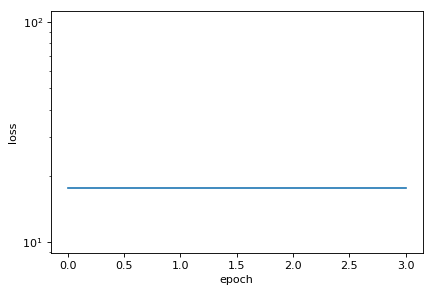

In [69]:
train(batch_size=1, lr=0.2, epochs=3, period=10)

当批量大小为 $1000$ 时，由于训练数据集含 $1000$ 个样本，此时训练使用的是梯度下降。在当前学习率下，目标函数值在前两个 `epoch` 下降较快。当 `epoch` 大于 $2$，学习率自我衰减后，目标函数值下降较慢。最终学到的参数值与真实值较接近。

Batch size 1000, Learning rate 0.999000, Epoch 1, loss 2.6667e+01
Batch size 1000, Learning rate 0.999000, Epoch 2, loss 2.6667e+01
Batch size 1000, Learning rate 0.099900, Epoch 3, loss 2.6667e+01
w: [[-0.48563418  1.6041543 ]] b: 0.0 



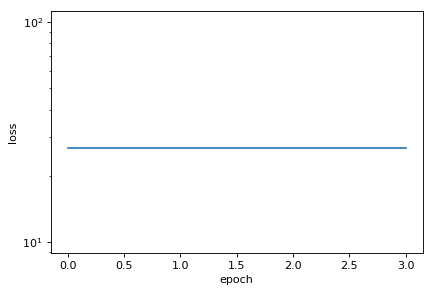

In [63]:
train(batch_size=1000, lr=0.999, epochs=3, period=1000)

当批量大小为 $10$ 时，由于训练数据集含 $1000$ 个样本，此时训练使用的是小批量随机梯度下降。最终学到的参数值与真实值较接近。

Batch size 10, Learning rate 0.200000, Epoch 1, loss 1.3285e+01
Batch size 10, Learning rate 0.200000, Epoch 2, loss 1.3285e+01
Batch size 10, Learning rate 0.020000, Epoch 3, loss 1.3285e+01
w: [[ 0.33379942 -1.2059169 ]] b: 0.0 



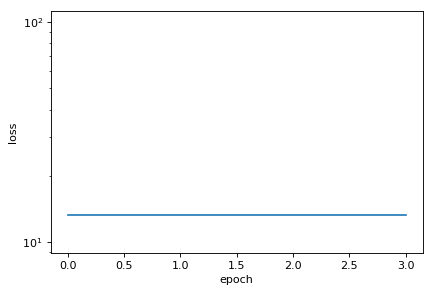

In [64]:
train(batch_size=10, lr=0.2, epochs=3, period=10)

同样是批量大小为 $10$，我们把学习率改大。这时我们观察到目标函数值不断增大。这时典型的 `overshooting` 问题。

Batch size 10, Learning rate 5.000000, Epoch 1, loss 1.9979e+01
Batch size 10, Learning rate 5.000000, Epoch 2, loss 1.9979e+01
Batch size 10, Learning rate 0.500000, Epoch 3, loss 1.9979e+01
w: [[-0.11159021  0.45567128]] b: 0.0 



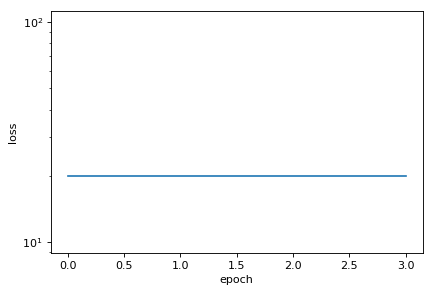

In [65]:
train(batch_size=10, lr=5, epochs=3, period=10)

同样是批量大小为 $10$，我们把学习率改小。这时我们观察到目标函数值下降较慢，直到 $3$ 个 `epoch` 也没能得到接近真实值的解。

Batch size 10, Learning rate 0.002000, Epoch 1, loss 1.9253e+01
Batch size 10, Learning rate 0.002000, Epoch 2, loss 1.9253e+01
Batch size 10, Learning rate 0.000200, Epoch 3, loss 1.9253e+01
w: [[0.32293546 0.4892735 ]] b: 0.0 



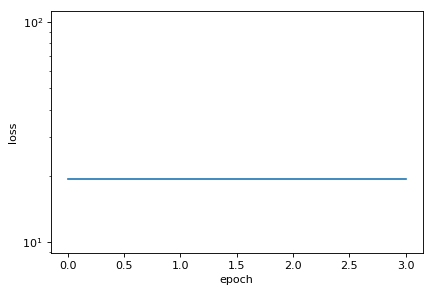

In [66]:
train(batch_size=10, lr=0.002, epochs=3, period=10)

### 结论
- 当训练数据较大，梯度下降每次迭代计算开销较大，因而（小批量）随机梯度下降更受青睐。
- 学习率过大过小都有问题。合适的学习率要靠实验来调。

### 练习
- 为什么实验中随机梯度下降的学习率是自我衰减的？
- 梯度下降和随机梯度下降虽然看上去有效，但可能会有哪些问题？

## 梯度下降和随机梯度下降 — 使用Gluon

In [70]:
import mxnet as mx
from mxnet import autograd
from mxnet import gluon
from mxnet import ndarray as nd
import numpy as np
import random

mx.random.seed(1)
random.seed(1)

# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(scale=1, shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(scale=1, shape=y.shape)
dataset = gluon.data.ArrayDataset(X, y)

net = gluon.nn.Sequential()
net.add(gluon.nn.Dense(1))
square_loss = gluon.loss.L2Loss()

为了使学习率在两个 `epoch` 后自我衰减，我们需要访问 `gluon.Trainer` 的 `learning_rate` 属性和 `set_learning_rate` 函数。

In [12]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt

def train(batch_size, lr, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    net.collect_params().initialize(mx.init.Normal(sigma=1), force_reinit=True)
    # 随机梯度下降。
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                            {'learning_rate': lr})
    data_iter = gluon.data.DataLoader(dataset, batch_size, shuffle=True)
    total_loss = [np.mean(square_loss(net(X), y).asnumpy())]
    for epoch in range(1, epochs + 1):
        # 学习率自我衰减。
        if epoch > 2:
            trainer.set_learning_rate(trainer.learning_rate * 0.1)
        for batch_i, (data, label) in enumerate(data_iter):
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
            if batch_i * batch_size % period == 0:
                total_loss.append(np.mean(square_loss(net(X), y).asnumpy()))
        print("Batch size %d, Learning rate %f, Epoch %d, loss %.4e" %
              (batch_size, trainer.learning_rate, epoch, total_loss[-1]))

    print('w:', np.reshape(net[0].weight.data().asnumpy(), (1, -1)),
          'b:', net[0].bias.data().asnumpy()[0], '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

当批量大小为 $1$ 时，训练使用的是随机梯度下降。在当前学习率下，目标函数值在早期快速下降后略有波动。当 `epoch` 大于 $2$，学习率自我衰减后，目标函数值下降后较平稳。最终学到的参数值与真实值较接近。

Batch size 1, Learning rate 0.200000, Epoch 1, loss 6.1711e-05
Batch size 1, Learning rate 0.200000, Epoch 2, loss 6.8211e-05
Batch size 1, Learning rate 0.020000, Epoch 3, loss 5.2027e-05
w: [[ 2.0003934 -3.400405 ]] b: 4.1990566 



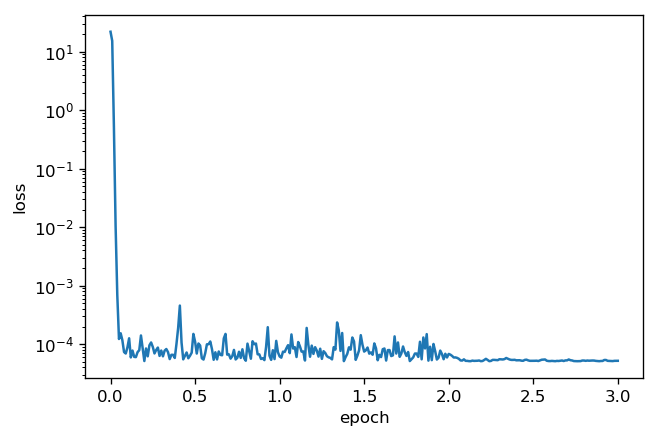

In [13]:
train(batch_size=1, lr=0.2, epochs=3, period=10)

当批量大小为 $1000$ 时，由于训练数据集含 $1000$ 个样本，此时训练使用的是梯度下降。在当前学习率下，目标函数值在前两个 `epoch` 下降较快。当 `epoch` 大于 $2$，学习率自我衰减后，目标函数值下降较慢。最终学到的参数值与真实值较接近。

Batch size 1000, Learning rate 0.999000, Epoch 1, loss 2.6396e-01
Batch size 1000, Learning rate 0.999000, Epoch 2, loss 2.9608e-03
Batch size 1000, Learning rate 0.099900, Epoch 3, loss 2.3531e-03
w: [[ 1.985956  -3.3415716]] b: 4.1770754 



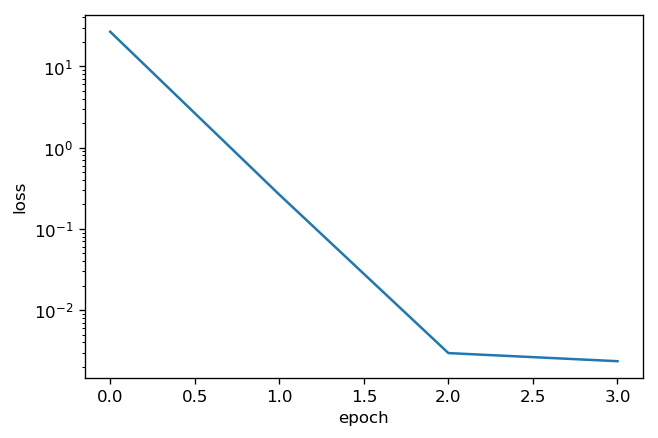

In [14]:
train(batch_size=1000, lr=0.999, epochs=3, period=1000)

当批量大小为 $10$ 时，由于训练数据集含 $1000$ 个样本，此时训练使用的是（小批量）随机梯度下降。最终学到的参数值与真实值较接近。

Batch size 10, Learning rate 0.200000, Epoch 1, loss 5.2451e-05
Batch size 10, Learning rate 0.200000, Epoch 2, loss 5.2520e-05
Batch size 10, Learning rate 0.020000, Epoch 3, loss 5.1186e-05
w: [[ 1.9996232 -3.400253 ]] b: 4.200364 



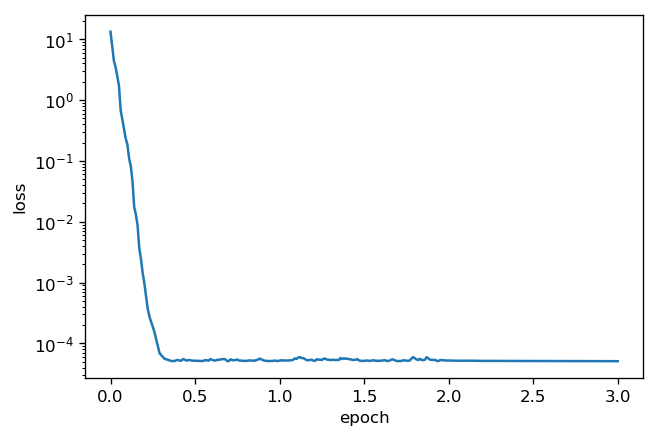

In [15]:
train(batch_size=10, lr=0.2, epochs=3, period=10)

同样是批量大小为 $10$，我们把学习率改大。这时我们观察到目标函数值不断增大。这时典型的 `overshooting` 问题。

c:\anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


Batch size 10, Learning rate 5.000000, Epoch 1, loss nan
Batch size 10, Learning rate 5.000000, Epoch 2, loss nan
Batch size 10, Learning rate 0.500000, Epoch 3, loss nan
w: [[nan nan]] b: nan 



c:\anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


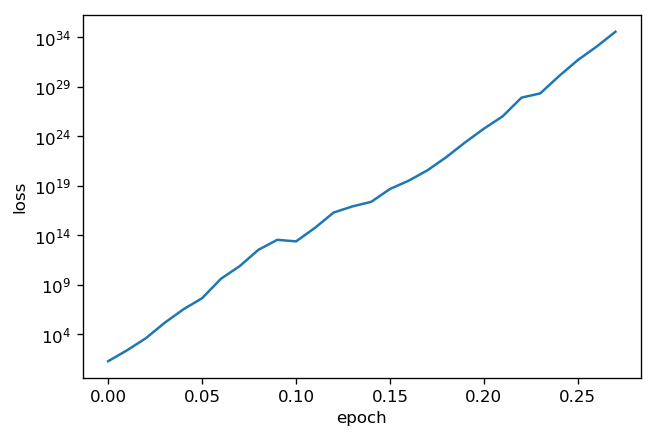

In [16]:
train(batch_size=10, lr=5, epochs=3, period=10)

同样是批量大小为 $10$，我们把学习率改小。这时我们观察到目标函数值下降较慢，直到 $3$ 个 `epoch` 也没能得到接近真实值的解。

Batch size 10, Learning rate 0.002000, Epoch 1, loss 1.2472e+01
Batch size 10, Learning rate 0.002000, Epoch 2, loss 8.0819e+00
Batch size 10, Learning rate 0.000200, Epoch 3, loss 7.7394e+00
w: [[ 0.92711866 -0.99246293]] b: 1.482976 



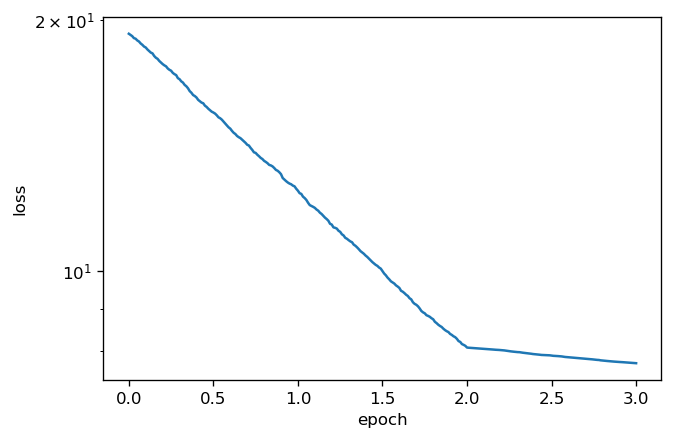

In [17]:
train(batch_size=10, lr=0.002, epochs=3, period=10)

### 结论
- 使用 `Gluon` 的 `Trainer` 可以使模型训练变得更容易。
- 使用 `gluon.Trainer` 的 `learning_rate` 属性和 `set_learning_rate` 函数可以随意调整学习率。

### 练习
你还能想到哪些学习率自我衰减的方法

## [动量法 — 从0开始](http://zh.gluon.ai/chapter_optimization/momentum-scratch.html)

In [4]:
# 动量法。
def sgd_momentum(params, vs, lr, mom, batch_size):
    for param, v in zip(params, vs):
        v[:] = mom * v + lr * param.grad / batch_size
        param -= v

In [5]:
import mxnet as mx
from mxnet import autograd
from mxnet import ndarray as nd
from mxnet import gluon
import random

mx.random.seed(1)
random.seed(1)

# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(scale=1, shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(scale=1, shape=y.shape)
dataset = gluon.data.ArrayDataset(X, y)

# 构造迭代器。
import random
def data_iter(batch_size):
    idx = list(range(num_examples))
    random.shuffle(idx)
    for batch_i, i in enumerate(range(0, num_examples, batch_size)):
        j = nd.array(idx[i: min(i + batch_size, num_examples)])
        yield batch_i, X.take(j), y.take(j)

# 初始化模型参数。
def init_params():
    w = nd.random_normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    params = [w, b]
    vs = []
    for param in params:
        param.attach_grad()
        # 把速度项初始化为和参数形状相同的零张量。
        vs.append(param.zeros_like())
    return params, vs

# 线性回归模型。
def net(X, w, b):
    return nd.dot(X, w) + b

# 损失函数。
def square_loss(yhat, y):
    return (yhat - y.reshape(yhat.shape)) ** 2 / 2

In [6]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt
import numpy as np

def train(batch_size, lr, mom, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    [w, b], vs = init_params()
    total_loss = [np.mean(square_loss(net(X, w, b), y).asnumpy())]

    # 注意epoch从1开始计数。
    for epoch in range(1, epochs + 1):
        # 重设学习率。
        if epoch > 2:
            lr *= 0.1
        for batch_i, data, label in data_iter(batch_size):
            with autograd.record():
                output = net(data, w, b)
                loss = square_loss(output, label)
            loss.backward()
            sgd_momentum([w, b], vs, lr, mom, batch_size)
            if batch_i * batch_size % period == 0:
                total_loss.append(np.mean(square_loss(net(X, w, b), y).asnumpy()))
        print("Batch size %d, Learning rate %f, Epoch %d, loss %.4e" %
              (batch_size, lr, epoch, total_loss[-1]))
    print('w:', np.reshape(w.asnumpy(), (1, -1)),
          'b:', b.asnumpy()[0], '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

Batch size 10, Learning rate 0.200000, Epoch 1, loss 1.4316e-02
Batch size 10, Learning rate 0.200000, Epoch 2, loss 6.2215e-05
Batch size 10, Learning rate 0.020000, Epoch 3, loss 5.2174e-05
w: [[ 1.999969  -3.4014332]] b: 4.1995444 



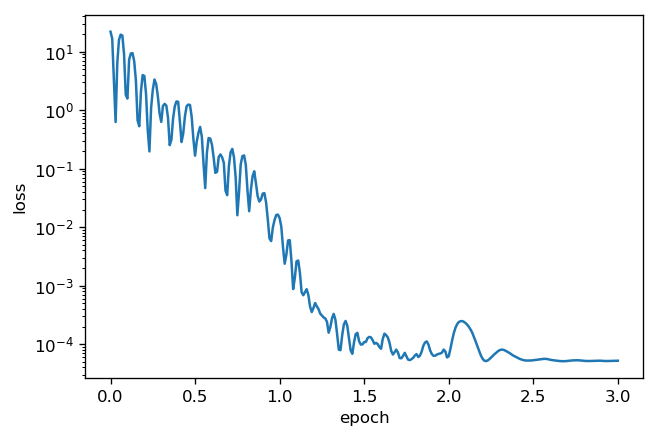

In [7]:
train(batch_size=10, lr=0.2, mom=0.9, epochs=3, period=10)

## 动量法 — 使用Gluon

In [8]:
import mxnet as mx
from mxnet import autograd
from mxnet import gluon
from mxnet import ndarray as nd
import numpy as np
import random

mx.random.seed(1)
random.seed(1)

# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(scale=1, shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(scale=1, shape=y.shape)
dataset = gluon.data.ArrayDataset(X, y)

net = gluon.nn.Sequential()
net.add(gluon.nn.Dense(1))
square_loss = gluon.loss.L2Loss()

In [9]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt

def train(batch_size, lr, mom, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    net.collect_params().initialize(mx.init.Normal(sigma=1), force_reinit=True)
    # 动量法。
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                            {'learning_rate': lr, 'momentum': mom})
    data_iter = gluon.data.DataLoader(dataset, batch_size, shuffle=True)
    total_loss = [np.mean(square_loss(net(X), y).asnumpy())]

    for epoch in range(1, epochs + 1):
        # 重设学习率。
        if epoch > 2:
            trainer.set_learning_rate(trainer.learning_rate * 0.1)
        for batch_i, (data, label) in enumerate(data_iter):
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)

            if batch_i * batch_size % period == 0:
                total_loss.append(np.mean(square_loss(net(X), y).asnumpy()))
        print("Batch size %d, Learning rate %f, Epoch %d, loss %.4e" %
              (batch_size, trainer.learning_rate, epoch, total_loss[-1]))

    print('w:', np.reshape(net[0].weight.data().asnumpy(), (1, -1)),
          'b:', net[0].bias.data().asnumpy()[0], '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

Batch size 10, Learning rate 0.200000, Epoch 1, loss 1.4316e-02
Batch size 10, Learning rate 0.200000, Epoch 2, loss 6.2215e-05
Batch size 10, Learning rate 0.020000, Epoch 3, loss 5.2174e-05
w: [[ 1.999969  -3.4014332]] b: 4.1995444 



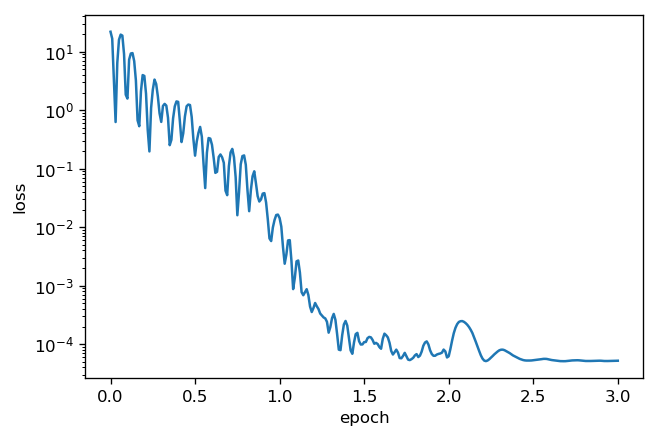

In [10]:
train(batch_size=10, lr=0.2, mom=0.9, epochs=3, period=10)

## [Adagrad — 从0开始](http://zh.gluon.ai/chapter_optimization/adagrad-scratch.html)

In [11]:
# Adagrad算法
def adagrad(params, sqrs, lr, batch_size):
    eps_stable = 1e-7
    for param, sqr in zip(params, sqrs):
        g = param.grad / batch_size
        sqr[:] += nd.square(g)
        div = lr * g / nd.sqrt(sqr + eps_stable)
        param[:] -= div

In [12]:
from mxnet import ndarray as nd
import mxnet as mx
from mxnet import autograd
from mxnet import gluon
import random

mx.random.seed(1)
random.seed(1)

# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(scale=1, shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(scale=1, shape=y.shape)
dataset = gluon.data.ArrayDataset(X, y)

# 构造迭代器。
import random
def data_iter(batch_size):
    idx = list(range(num_examples))
    random.shuffle(idx)
    for batch_i, i in enumerate(range(0, num_examples, batch_size)):
        j = nd.array(idx[i: min(i + batch_size, num_examples)])
        yield batch_i, X.take(j), y.take(j)

# 初始化模型参数。
def init_params():
    w = nd.random_normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    params = [w, b]
    sqrs = []
    for param in params:
        param.attach_grad()
        # 把梯度按元素平方的累加变量初始化为和参数形状相同的零张量。
        sqrs.append(param.zeros_like())
    return params, sqrs

# 线性回归模型。
def net(X, w, b):
    return nd.dot(X, w) + b

# 损失函数。
def square_loss(yhat, y):
    return (yhat - y.reshape(yhat.shape)) ** 2 / 2

In [13]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt
import numpy as np

def train(batch_size, lr, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    [w, b], sqrs = init_params()
    total_loss = [np.mean(square_loss(net(X, w, b), y).asnumpy())]

    # 注意epoch从1开始计数。
    for epoch in range(1, epochs + 1):
        for batch_i, data, label in data_iter(batch_size):
            with autograd.record():
                output = net(data, w, b)
                loss = square_loss(output, label)
            loss.backward()
            adagrad([w, b], sqrs, lr, batch_size)
            if batch_i * batch_size % period == 0:
                total_loss.append(np.mean(square_loss(net(X, w, b), y).asnumpy()))
        print("Batch size %d, Learning rate %f, Epoch %d, loss %.4e" %
              (batch_size, lr, epoch, total_loss[-1]))
    print('w:', np.reshape(w.asnumpy(), (1, -1)),
          'b:', b.asnumpy()[0], '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

Batch size 10, Learning rate 0.900000, Epoch 1, loss 5.1843e-05
Batch size 10, Learning rate 0.900000, Epoch 2, loss 5.2248e-05
Batch size 10, Learning rate 0.900000, Epoch 3, loss 5.1507e-05
w: [[ 2.0000997 -3.4004908]] b: 4.199482 



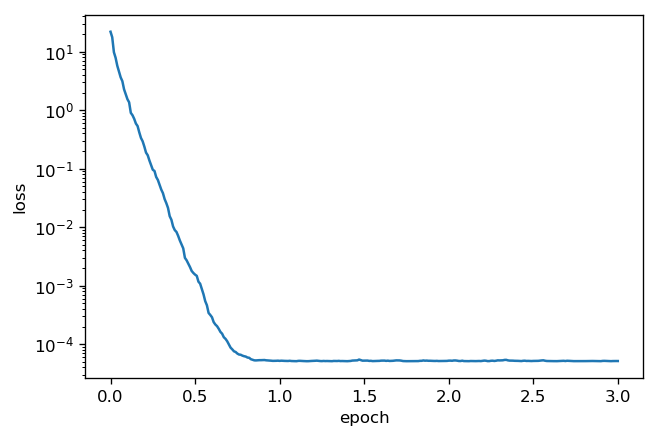

In [14]:
train(batch_size=10, lr=0.9, epochs=3, period=10)

## Adagrad — 使用Gluon

In [15]:
import mxnet as mx
from mxnet import autograd
from mxnet import gluon
from mxnet import ndarray as nd
import numpy as np
import random

mx.random.seed(1)
random.seed(1)

# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(scale=1, shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(scale=1, shape=y.shape)
dataset = gluon.data.ArrayDataset(X, y)

net = gluon.nn.Sequential()
net.add(gluon.nn.Dense(1))
square_loss = gluon.loss.L2Loss()

In [16]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt

def train(batch_size, lr, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    net.collect_params().initialize(mx.init.Normal(sigma=1), force_reinit=True)
    # Adagrad。
    trainer = gluon.Trainer(net.collect_params(), 'adagrad',
                            {'learning_rate': lr})
    data_iter = gluon.data.DataLoader(dataset, batch_size, shuffle=True)
    total_loss = [np.mean(square_loss(net(X), y).asnumpy())]

    for epoch in range(1, epochs + 1):
        for batch_i, (data, label) in enumerate(data_iter):
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
            if batch_i * batch_size % period == 0:
                total_loss.append(np.mean(square_loss(net(X), y).asnumpy()))
        print("Batch size %d, Learning rate %f, Epoch %d, loss %.4e" %
              (batch_size, trainer.learning_rate, epoch, total_loss[-1]))

    print('w:', np.reshape(net[0].weight.data().asnumpy(), (1, -1)),
          'b:', net[0].bias.data().asnumpy()[0], '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

Batch size 10, Learning rate 0.900000, Epoch 1, loss 5.1843e-05
Batch size 10, Learning rate 0.900000, Epoch 2, loss 5.2248e-05
Batch size 10, Learning rate 0.900000, Epoch 3, loss 5.1507e-05
w: [[ 2.0000997 -3.4004908]] b: 4.199482 



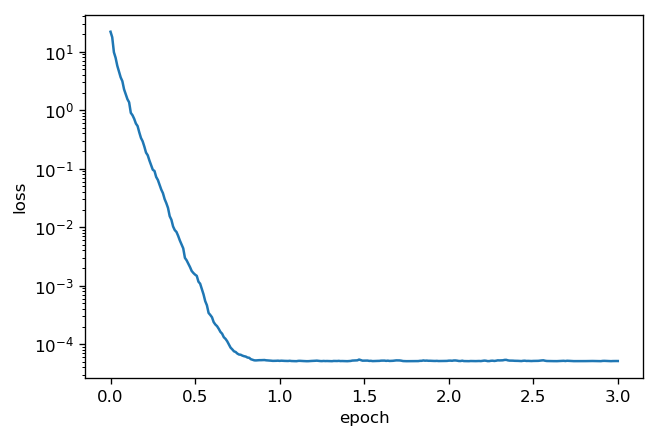

In [17]:
train(batch_size=10, lr=0.9, epochs=3, period=10)

## [RMSProp — 从0开始](http://zh.gluon.ai/chapter_optimization/rmsprop-scratch.html)

In [18]:
# RMSProp
def rmsprop(params, sqrs, lr, gamma, batch_size):
    eps_stable = 1e-8
    for param, sqr in zip(params, sqrs):
        g = param.grad / batch_size
        sqr[:] = gamma * sqr + (1. - gamma) * nd.square(g)
        div = lr * g / nd.sqrt(sqr + eps_stable)
        param[:] -= div

In [19]:
from mxnet import ndarray as nd
import mxnet as mx
from mxnet import autograd
from mxnet import gluon
import random

mx.random.seed(1)
random.seed(1)

# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(scale=1, shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(scale=1, shape=y.shape)
dataset = gluon.data.ArrayDataset(X, y)

# 构造迭代器。
import random
def data_iter(batch_size):
    idx = list(range(num_examples))
    random.shuffle(idx)
    for batch_i, i in enumerate(range(0, num_examples, batch_size)):
        j = nd.array(idx[i: min(i + batch_size, num_examples)])
        yield batch_i, X.take(j), y.take(j)

# 初始化模型参数。
def init_params():
    w = nd.random_normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    params = [w, b]
    sqrs = []
    for param in params:
        param.attach_grad()
        # 把梯度按元素平方的指数加权移动平均变量初始化为和参数形状相同的零张量。
        sqrs.append(param.zeros_like())
    return params, sqrs

# 线性回归模型。
def net(X, w, b):
    return nd.dot(X, w) + b

# 损失函数。
def square_loss(yhat, y):
    return (yhat - y.reshape(yhat.shape)) ** 2 / 2

In [20]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt
import numpy as np

def train(batch_size, lr, gamma, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    [w, b], sqrs = init_params()
    total_loss = [np.mean(square_loss(net(X, w, b), y).asnumpy())]

    # 注意epoch从1开始计数。
    for epoch in range(1, epochs + 1):
        for batch_i, data, label in data_iter(batch_size):
            with autograd.record():
                output = net(data, w, b)
                loss = square_loss(output, label)
            loss.backward()
            rmsprop([w, b], sqrs, lr, gamma, batch_size)
            if batch_i * batch_size % period == 0:
                total_loss.append(np.mean(square_loss(net(X, w, b), y).asnumpy()))
        print("Batch size %d, Learning rate %f, Epoch %d, loss %.4e" %
              (batch_size, lr, epoch, total_loss[-1]))
    print('w:', np.reshape(w.asnumpy(), (1, -1)),
          'b:', b.asnumpy()[0], '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

我们将初始学习率设为 $0.03$，并将 `gamma` 设为 $0.9$。损失函数在迭代后期较震荡。

Batch size 10, Learning rate 0.030000, Epoch 1, loss 2.4676e+00
Batch size 10, Learning rate 0.030000, Epoch 2, loss 6.3578e-05
Batch size 10, Learning rate 0.030000, Epoch 3, loss 2.9436e-04
w: [[ 2.0184188 -3.3948147]] b: 4.1910057 



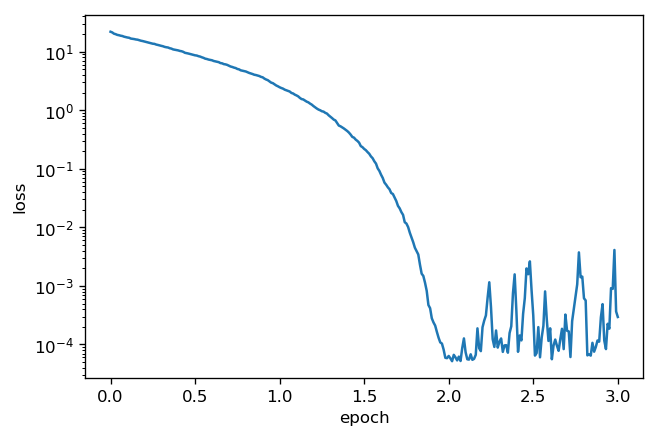

In [21]:
train(batch_size=10, lr=0.03, gamma=0.9, epochs=3, period=10)

我们将 `gamma` 调大一点，例如 $0.999$。这时损失函数在迭代后期较平滑。

Batch size 10, Learning rate 0.030000, Epoch 1, loss 5.4582e-05
Batch size 10, Learning rate 0.030000, Epoch 2, loss 5.4898e-05
Batch size 10, Learning rate 0.030000, Epoch 3, loss 5.3091e-05
w: [[ 1.9994541 -3.4014854]] b: 4.198687 



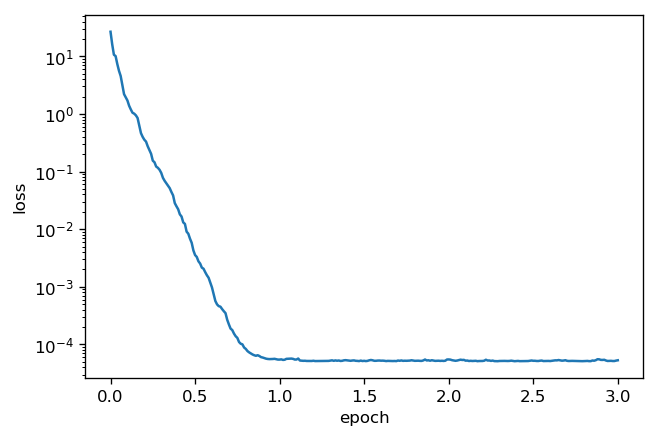

In [22]:
train(batch_size=10, lr=0.03, gamma=0.999, epochs=3, period=10)

## RMSProp — 使用Gluon

In [23]:
import mxnet as mx
from mxnet import autograd
from mxnet import gluon
from mxnet import ndarray as nd
import numpy as np
import random

mx.random.seed(1)
random.seed(1)

# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(scale=1, shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(scale=1, shape=y.shape)
dataset = gluon.data.ArrayDataset(X, y)

net = gluon.nn.Sequential()
net.add(gluon.nn.Dense(1))
square_loss = gluon.loss.L2Loss()

In [24]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt

def train(batch_size, lr, gamma, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    net.collect_params().initialize(mx.init.Normal(sigma=1), force_reinit=True)
    # RMSProp。
    trainer = gluon.Trainer(net.collect_params(), 'rmsprop',
                            {'learning_rate': lr, 'gamma1': gamma})
    data_iter = gluon.data.DataLoader(dataset, batch_size, shuffle=True)
    total_loss = [np.mean(square_loss(net(X), y).asnumpy())]

    for epoch in range(1, epochs + 1):
        for batch_i, (data, label) in enumerate(data_iter):
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
            if batch_i * batch_size % period == 0:
                total_loss.append(np.mean(square_loss(net(X), y).asnumpy()))
        print("Batch size %d, Learning rate %f, Epoch %d, loss %.4e" %
              (batch_size, trainer.learning_rate, epoch, total_loss[-1]))

    print('w:', np.reshape(net[0].weight.data().asnumpy(), (1, -1)),
          'b:', net[0].bias.data().asnumpy()[0], '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

Batch size 10, Learning rate 0.030000, Epoch 1, loss 2.4676e+00
Batch size 10, Learning rate 0.030000, Epoch 2, loss 6.3578e-05
Batch size 10, Learning rate 0.030000, Epoch 3, loss 2.9435e-04
w: [[ 2.0184183 -3.3948147]] b: 4.191006 



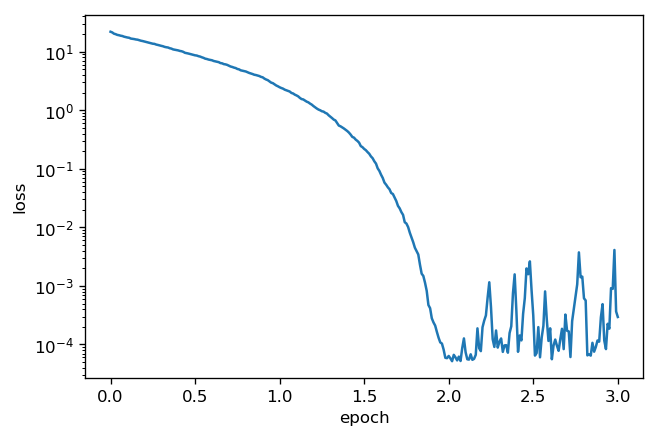

In [25]:
train(batch_size=10, lr=0.03, gamma=0.9, epochs=3, period=10)

Batch size 10, Learning rate 0.030000, Epoch 1, loss 5.4583e-05
Batch size 10, Learning rate 0.030000, Epoch 2, loss 5.4898e-05
Batch size 10, Learning rate 0.030000, Epoch 3, loss 5.3091e-05
w: [[ 1.9994541 -3.4014854]] b: 4.198687 



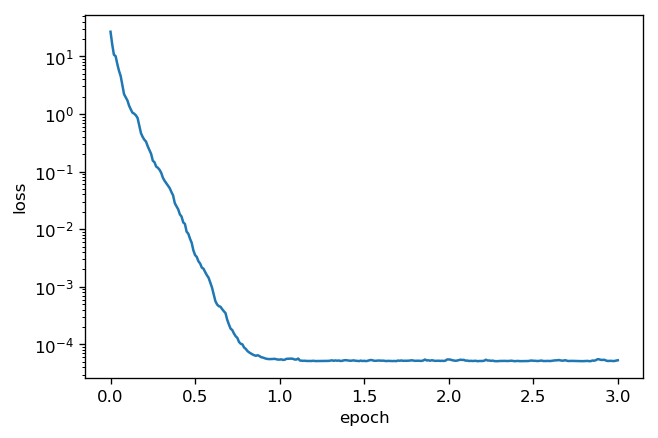

In [26]:
train(batch_size=10, lr=0.03, gamma=0.999, epochs=3, period=10)

## [Adadelta — 从0开始](http://zh.gluon.ai/chapter_optimization/adadelta-scratch.html)

In [27]:
# Adadalta
def adadelta(params, sqrs, deltas, rho, batch_size):
    eps_stable = 1e-5
    for param, sqr, delta in zip(params, sqrs, deltas):
        g = param.grad / batch_size
        sqr[:] = rho * sqr + (1. - rho) * nd.square(g)
        cur_delta = nd.sqrt(delta + eps_stable) / nd.sqrt(sqr + eps_stable) * g
        delta[:] = rho * delta + (1. - rho) * cur_delta * cur_delta
        param[:] -= cur_delta

In [28]:
from mxnet import ndarray as nd
import mxnet as mx
from mxnet import autograd
from mxnet import gluon
import random

mx.random.seed(1)
random.seed(1)

# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(scale=1, shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(scale=1, shape=y.shape)
dataset = gluon.data.ArrayDataset(X, y)

# 构造迭代器。
import random
def data_iter(batch_size):
    idx = list(range(num_examples))
    random.shuffle(idx)
    for batch_i, i in enumerate(range(0, num_examples, batch_size)):
        j = nd.array(idx[i: min(i + batch_size, num_examples)])
        yield batch_i, X.take(j), y.take(j)

# 初始化模型参数。
def init_params():
    w = nd.random_normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    params = [w, b]
    sqrs = []
    deltas = []
    for param in params:
        param.attach_grad()
        # 把算法中基于指数加权移动平均的变量初始化为和参数形状相同的零张量。
        sqrs.append(param.zeros_like())
        deltas.append(param.zeros_like())
    return params, sqrs, deltas

# 线性回归模型。
def net(X, w, b):
    return nd.dot(X, w) + b

# 损失函数。
def square_loss(yhat, y):
    return (yhat - y.reshape(yhat.shape)) ** 2 / 2

In [29]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt
import numpy as np

def train(batch_size, rho, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    [w, b], sqrs, deltas = init_params()
    total_loss = [np.mean(square_loss(net(X, w, b), y).asnumpy())]

    # 注意epoch从1开始计数。
    for epoch in range(1, epochs + 1):
        for batch_i, data, label in data_iter(batch_size):
            with autograd.record():
                output = net(data, w, b)
                loss = square_loss(output, label)
            loss.backward()
            adadelta([w, b], sqrs, deltas, rho, batch_size)
            if batch_i * batch_size % period == 0:
                total_loss.append(np.mean(square_loss(net(X, w, b), y).asnumpy()))
        print("Batch size %d, Epoch %d, loss %.4e" %
              (batch_size, epoch, total_loss[-1]))
    print('w:', np.reshape(w.asnumpy(), (1, -1)),
          'b:', b.asnumpy()[0], '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

Batch size 10, Epoch 1, loss 9.1847e-05
Batch size 10, Epoch 2, loss 5.2045e-05
Batch size 10, Epoch 3, loss 5.1386e-05
w: [[ 2.000041  -3.4004762]] b: 4.1996427 



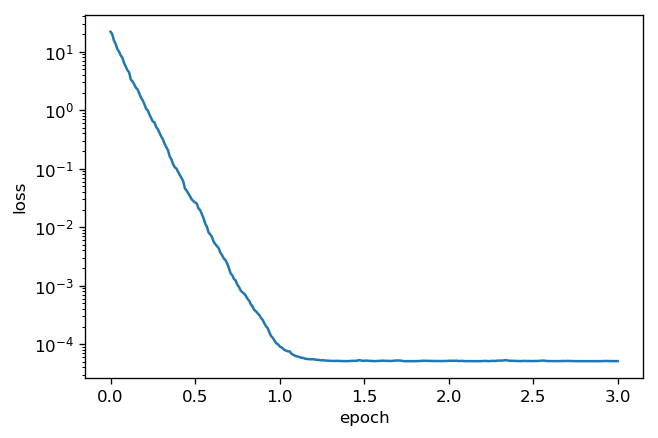

In [30]:
train(batch_size=10, rho=0.9999, epochs=3, period=10)

## Adadelta — 使用Gluon

In [31]:
import mxnet as mx
from mxnet import autograd
from mxnet import gluon
from mxnet import ndarray as nd
import numpy as np
import random

mx.random.seed(1)
random.seed(1)

# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(scale=1, shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(scale=1, shape=y.shape)
dataset = gluon.data.ArrayDataset(X, y)

net = gluon.nn.Sequential()
net.add(gluon.nn.Dense(1))
square_loss = gluon.loss.L2Loss()

In [32]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt

def train(batch_size, rho, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    net.collect_params().initialize(mx.init.Normal(sigma=1), force_reinit=True)
    # Adadelta。
    trainer = gluon.Trainer(net.collect_params(), 'adadelta',
                            {'rho': rho})
    data_iter = gluon.data.DataLoader(dataset, batch_size, shuffle=True)
    total_loss = [np.mean(square_loss(net(X), y).asnumpy())]

    for epoch in range(1, epochs + 1):
        for batch_i, (data, label) in enumerate(data_iter):
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)

            if batch_i * batch_size % period == 0:
                total_loss.append(np.mean(square_loss(net(X), y).asnumpy()))
        print("Batch size %d, Epoch %d, loss %.4e" %
              (batch_size, epoch, total_loss[-1]))

    print('w:', np.reshape(net[0].weight.data().asnumpy(), (1, -1)),
          'b:', net[0].bias.data().asnumpy()[0], '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

Batch size 10, Epoch 1, loss 9.1847e-05
Batch size 10, Epoch 2, loss 5.2045e-05
Batch size 10, Epoch 3, loss 5.1386e-05
w: [[ 2.000041  -3.4004762]] b: 4.1996427 



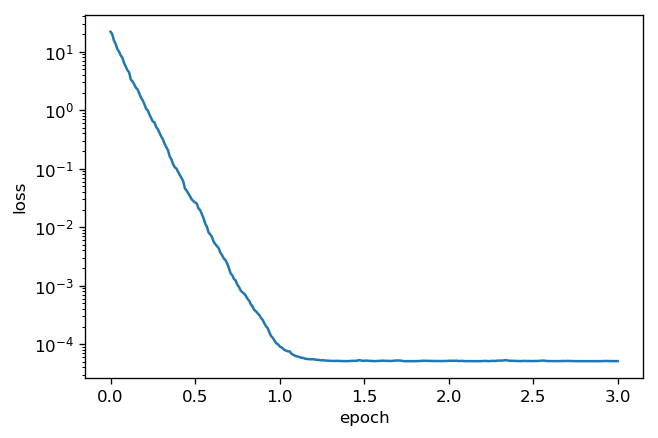

In [33]:
train(batch_size=10, rho=0.9999, epochs=3, period=10)

## [Adam — 从0开始](http://zh.gluon.ai/chapter_optimization/adam-scratch.html)

In [34]:
# Adam。
def adam(params, vs, sqrs, lr, batch_size, t):
    beta1 = 0.9
    beta2 = 0.999
    eps_stable = 1e-8
    for param, v, sqr in zip(params, vs, sqrs):
        g = param.grad / batch_size
        v[:] = beta1 * v + (1. - beta1) * g
        sqr[:] = beta2 * sqr + (1. - beta2) * nd.square(g)
        v_bias_corr = v / (1. - beta1 ** t)
        sqr_bias_corr = sqr / (1. - beta2 ** t)
        div = lr * v_bias_corr / (nd.sqrt(sqr_bias_corr) + eps_stable)
        param[:] = param - div

In [35]:
import mxnet as mx
from mxnet import autograd
from mxnet import ndarray as nd
from mxnet import gluon
import random

mx.random.seed(1)
random.seed(1)

# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(scale=1, shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(scale=1, shape=y.shape)
dataset = gluon.data.ArrayDataset(X, y)

# 构造迭代器。
import random
def data_iter(batch_size):
    idx = list(range(num_examples))
    random.shuffle(idx)
    for batch_i, i in enumerate(range(0, num_examples, batch_size)):
        j = nd.array(idx[i: min(i + batch_size, num_examples)])
        yield batch_i, X.take(j), y.take(j)

# 初始化模型参数。
def init_params():
    w = nd.random_normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    params = [w, b]
    vs = []
    sqrs = []
    for param in params:
        param.attach_grad()
        # 把算法中基于指数加权移动平均的变量初始化为和参数形状相同的零张量。
        vs.append(param.zeros_like())
        sqrs.append(param.zeros_like())
    return params, vs, sqrs

# 线性回归模型。
def net(X, w, b):
    return nd.dot(X, w) + b

# 损失函数。
def square_loss(yhat, y):
    return (yhat - y.reshape(yhat.shape)) ** 2 / 2

In [36]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt
import numpy as np

def train(batch_size, lr, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    [w, b], vs, sqrs = init_params()
    total_loss = [np.mean(square_loss(net(X, w, b), y).asnumpy())]

    # 注意epoch从1开始计数。
    t = 0
    for epoch in range(1, epochs + 1):
        for batch_i, data, label in data_iter(batch_size):
            with autograd.record():
                output = net(data, w, b)
                loss = square_loss(output, label)
            loss.backward()
            # 必须在调用Adam前。
            t += 1
            adam([w, b], vs, sqrs, lr, batch_size, t)
            if batch_i * batch_size % period == 0:
                total_loss.append(np.mean(square_loss(net(X, w, b), y).asnumpy()))
        print("Batch size %d, Learning rate %f, Epoch %d, loss %.4e" %
              (batch_size, lr, epoch, total_loss[-1]))
    print('w:', np.reshape(w.asnumpy(), (1, -1)),
          'b:', b.asnumpy()[0], '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

Batch size 10, Learning rate 0.100000, Epoch 1, loss 5.7667e-04
Batch size 10, Learning rate 0.100000, Epoch 2, loss 5.2377e-05
Batch size 10, Learning rate 0.100000, Epoch 3, loss 5.1530e-05
w: [[ 2.0000498 -3.4008262]] b: 4.1996875 



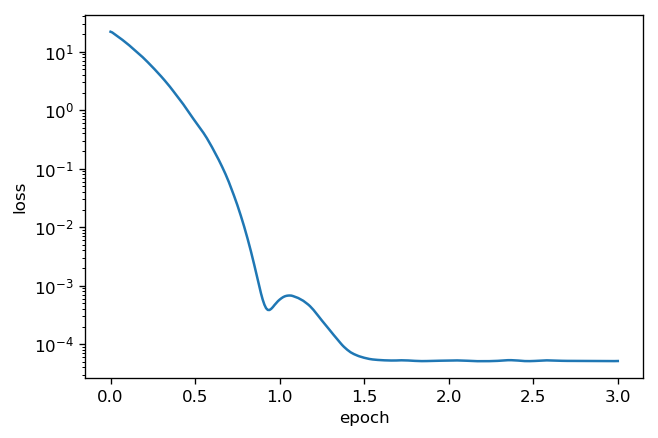

In [37]:

train(batch_size=10, lr=0.1, epochs=3, period=10)

## Adam — 使用Gluon

In [38]:
import mxnet as mx
from mxnet import autograd
from mxnet import gluon
from mxnet import ndarray as nd
import numpy as np
import random

mx.random.seed(1)
random.seed(1)

# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(scale=1, shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(scale=1, shape=y.shape)
dataset = gluon.data.ArrayDataset(X, y)

net = gluon.nn.Sequential()
net.add(gluon.nn.Dense(1))
square_loss = gluon.loss.L2Loss()

In [39]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt

def train(batch_size, lr, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    net.collect_params().initialize(mx.init.Normal(sigma=1), force_reinit=True)
    # Adam。
    trainer = gluon.Trainer(net.collect_params(), 'adam',
                            {'learning_rate': lr})
    data_iter = gluon.data.DataLoader(dataset, batch_size, shuffle=True)
    total_loss = [np.mean(square_loss(net(X), y).asnumpy())]

    for epoch in range(1, epochs + 1):
        for batch_i, (data, label) in enumerate(data_iter):
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
            if batch_i * batch_size % period == 0:
                total_loss.append(np.mean(square_loss(net(X), y).asnumpy()))
        print("Batch size %d, Learning rate %f, Epoch %d, loss %.4e" %
              (batch_size, trainer.learning_rate, epoch, total_loss[-1]))

    print('w:', np.reshape(net[0].weight.data().asnumpy(), (1, -1)),
          'b:', net[0].bias.data().asnumpy()[0], '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

Batch size 10, Learning rate 0.100000, Epoch 1, loss 5.7678e-04
Batch size 10, Learning rate 0.100000, Epoch 2, loss 5.2377e-05
Batch size 10, Learning rate 0.100000, Epoch 3, loss 5.1530e-05
w: [[ 2.0000498 -3.4008262]] b: 4.1996875 



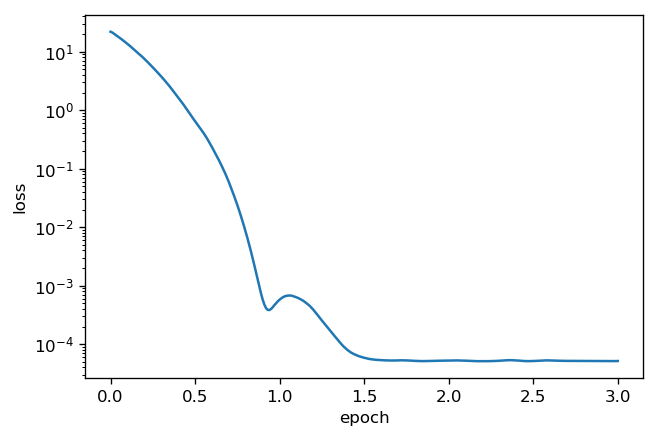

In [40]:

train(batch_size=10, lr=0.1, epochs=3, period=10)